In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set the default font size for all text in the plot
plt.rcParams.update({'font.size': 16})

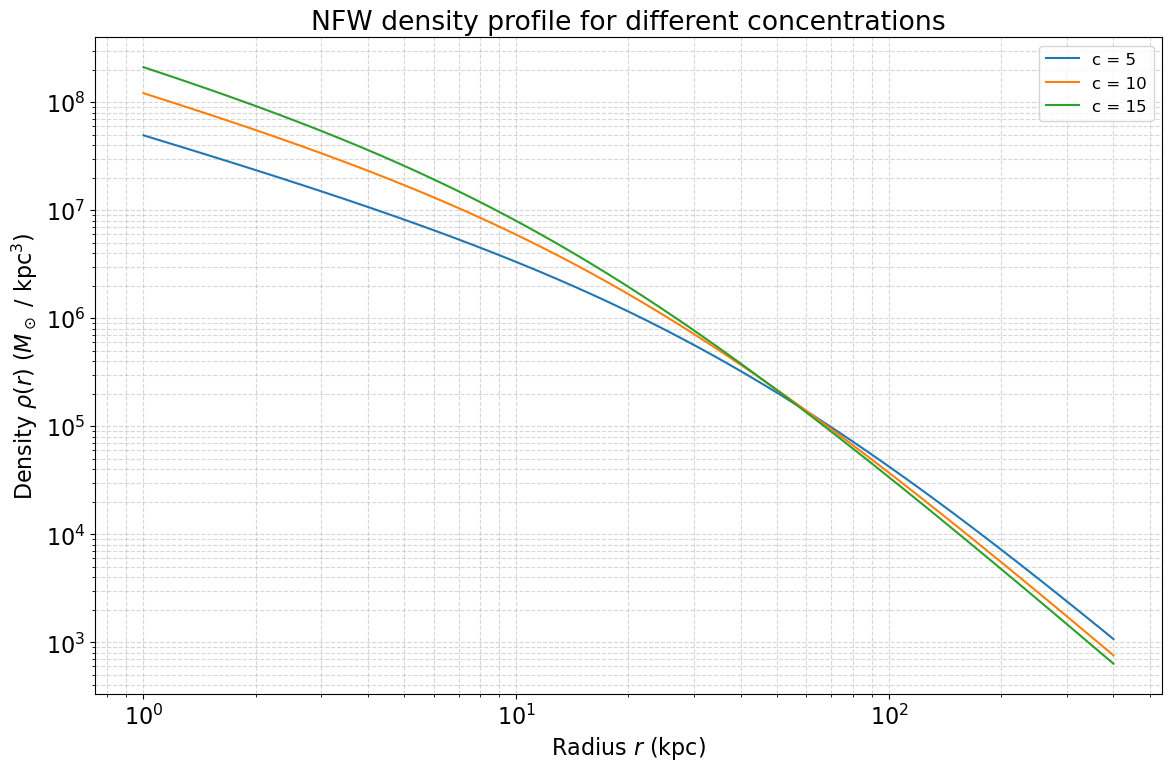

In [12]:
# Constants
G = 4.30091e-6  # Gravitational constant (kpc * M_sun^-1 * (km/s)^2)
M200 = 1e12     # Total mass within r200 (solar masses)
r200 = 200      # Virial radius in kiloparsecs (kpc)

# Radial distance array from 1 kpc to 2*r200
r = np.logspace(0, np.log10(2*r200), 1000)

# Concentration parameters to plot
c_values = [5, 10, 15]

# Plotting the NFW density profiles
plt.figure(figsize=(12, 8))

for c in c_values:
    # Scale radius
    r_s = r200 / c
    
    # Calculate the characteristic density rho_s for each concentration
    x = c
    factor = np.log(1 + x) - x / (1 + x)
    rho_s = M200 / (4 * np.pi * r_s**3 * factor)
    
    # NFW density profile
    rho = rho_s / ((r / r_s) * (1 + r / r_s)**2)
    
    # Plot the profile
    plt.loglog(r, rho, label=f'c = {c}')

# Plot formatting
plt.xlabel('Radius $r$ (kpc)')
plt.ylabel('Density $\\rho(r)$ ($M_\\odot$ / kpc$^3$)')
plt.title('NFW density profile for different concentrations')
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig("../Figures/nfw_density.png", format="png", 
            dpi=300, transparent=False, facecolor='white', bbox_inches='tight')

plt.show()